### 1. Load Train / Test / Validation Data Files

In [1]:
import numpy as np

In [2]:
train_features_path =  "../template/ICDAR-feature/train_features.npy"
train_names_path = "../template/ICDAR-feature/train_names.npy"
train_labels_path = "../template/ICDAR-feature/train_labels.npy"

test_features_path = "../template/ICDAR-feature/test_features.npy"
test_names_path = "../template/ICDAR-feature/test_names.npy"
test_labels_path = "../template/ICDAR-feature/test_labels.npy"

validation_features_path = "../template/ICDAR-feature/validation_features.npy"
validation_names_path = "../template/ICDAR-feature/validation_names.npy"
validation_labels_path = "../template/ICDAR-feature/validation_labels.npy"

gallery_feature_path = "../template/ICDAR-feature/gallery_features.npy"
gallery_name_path = "../template/ICDAR-feature/gallery_names.npy"

train_features = np.load(train_features_path)
train_names = np.load(train_names_path)
train_labels = np.load(train_labels_path)

test_features = np.load(test_features_path)
test_names = np.load(test_names_path)
test_labels = np.load(test_labels_path)

validation_features = np.load(validation_features_path)
validation_names = np.load(validation_names_path)
validation_labels = np.load(validation_labels_path)

gallery_features = np.load(gallery_feature_path)
gallery_names = np.load(gallery_name_path)

FileNotFoundError: [Errno 2] No such file or directory: '../template/ICDAR-feature/train_features.npy'

In [ ]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)
print(validation_features.shape)
print(validation_labels.shape)
print(gallery_features.shape)

(857, 512)
(857,)
(401, 512)
(401,)
(391, 512)
(391,)
(64, 512)


### Euclidean Distance

In [ ]:
def euclidean_distance(feature_vector1, feature_vector2):
    return np.sqrt(np.sum((feature_vector1 - feature_vector2)**2))

def find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names):
    euclidean_distances = []
    euclidean_names = []
    euclidean_actual_labels = []

    for gallery_feature, gallery_name in zip(gallery_features, gallery_names):
        curr_euclid_name = gallery_name
        curr_euclid_feature = []
        curr_euclid_label = []
        curr_euclid_dist = []
        for feature, name, label in zip(test_features, test_names, test_labels):
            if gallery_name in name:
                curr_euclid_feature.append(feature)
                curr_euclid_label.append(label)
        
        for feature in curr_euclid_feature:
            distance = euclidean_distance(feature, gallery_feature)
            curr_euclid_dist.append(distance)

        euclidean_distances.append(curr_euclid_dist)
        euclidean_names.append(curr_euclid_name)
        euclidean_actual_labels.append(curr_euclid_label)
        
    return euclidean_distances, euclidean_names, euclidean_actual_labels

In [ ]:
test_euclidean_distances, test_euclidean_names, test_euclidean_actual_labels = find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names)
train_euclidean_distances, train_euclidean_names, train_euclidean_actual_labels = find_euclidean_distance(train_features, train_names, train_labels, gallery_features, gallery_names)
validation_euclidean_distances, validation_euclidean_names, validation_euclidean_actual_labels = find_euclidean_distance(validation_features, validation_names, validation_labels, gallery_features, gallery_names)

### Normalize Euclidean Distance

In [ ]:
def normalize_distance(euclidean_distances):
    all_distances = []
    for distances in euclidean_distances:
        min_distance = min(distances)
        max_distance = max(distances)

        normalized_distances = [(d - min_distance) / (max_distance - min_distance) for d in distances]
        all_distances.append(normalized_distances)

    return all_distances

def reverse_normalized_distance(euclidean_distances):
    reverse_distance = []
    normalized_distances = normalize_distance(euclidean_distances)
    for distances in normalized_distances:
        temp = []
        for distance in distances :
            distance = -distance
            temp.append(distance)
        reverse_distance.append(temp)
    return reverse_distance

In [ ]:
normalized_test_euclidean_distance = reverse_normalized_distance(test_euclidean_distances)
normalized_train_euclidean_distance = reverse_normalized_distance(train_euclidean_distances)
normalized_validation_euclidean_distance = reverse_normalized_distance(validation_euclidean_distances)

### 2. Train on ML

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Flatten Train Set
flattened_train_distances = [item for sublist in normalized_train_euclidean_distance for item in sublist]
flattened_train_distances_array = np.array(flattened_train_distances)
flattened_train_distances_array = flattened_train_distances_array.reshape(-1, 1)

flattened_train_labels = [item for sublist in train_euclidean_actual_labels for item in sublist]
flattened_train_labels_array = np.array(flattened_train_labels)
flattened_train_labels_array = flattened_train_labels_array.reshape(-1, 1)
flattened_train_labels_array = np.ravel(flattened_train_labels_array)

# Flatten Test Set
flattened_test_distances = [item for sublist in normalized_test_euclidean_distance for item in sublist]
flattened_test_distances_array = np.array(flattened_test_distances)
flattened_test_distances_array = flattened_test_distances_array.reshape(-1, 1)

flattened_test_labels = [item for sublist in test_euclidean_actual_labels for item in sublist]
flattened_test_labels_array = np.array(flattened_test_labels)
flattened_test_labels_array = flattened_test_labels_array.reshape(-1, 1)
flattened_test_labels_array = np.ravel(flattened_test_labels_array)

# Flatten Validation Set
flattened_validation_distances = [item for sublist in normalized_validation_euclidean_distance for item in sublist]
flattened_validation_distances_array = np.array(flattened_validation_distances)
flattened_validation_distances_array = flattened_validation_distances_array.reshape(-1, 1)

flattened_validation_labels = [item for sublist in validation_euclidean_actual_labels for item in sublist]
flattened_validation_labels_array = np.array(flattened_validation_labels)
flattened_validation_labels_array = flattened_validation_labels_array.reshape(-1, 1)
flattened_validation_labels_array = np.ravel(flattened_validation_labels_array)


In [ ]:
model = svm.SVC()
model.fit(flattened_train_distances_array, flattened_train_labels_array)

SVC()

### 3. Hyperparameter Tuning

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid_search.fit(flattened_validation_distances_array, flattened_validation_labels_array)
best_params = grid_search.best_params_

### 4. Test

In [ ]:
best_model = svm.SVC(**best_params)
best_model.fit(flattened_train_distances_array , flattened_train_labels_array )
test_pred = best_model.predict(flattened_test_distances_array)
accuracy = accuracy_score(flattened_test_labels_array , test_pred)

In [ ]:
print(accuracy)

0.940149625935162


### 5. ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

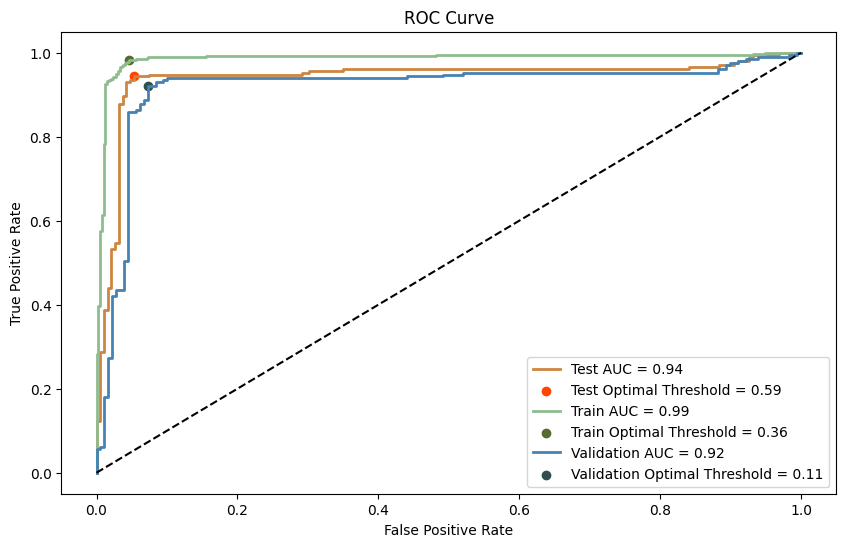

In [ ]:
# Predict probabilities for each class
y_train_prob = best_model.decision_function(flattened_train_distances_array)
y_test_prob = best_model.decision_function(flattened_test_distances_array)
y_val_prob = best_model.decision_function(flattened_validation_distances_array)

# Compute ROC curve and AUC for each set
fpr_train, tpr_train, thresholds_train = roc_curve(flattened_train_labels_array, y_train_prob, drop_intermediate=False)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = roc_curve(flattened_test_labels_array, y_test_prob, drop_intermediate=False)
roc_auc_test = auc(fpr_test, tpr_test)
fpr_val, tpr_val, thresholds_val = roc_curve(flattened_validation_labels_array, y_val_prob, drop_intermediate=False)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate Youden's J statistic
J_values_test = tpr_test - fpr_test
optimal_idx_test = np.argmax(J_values_test)
optimal_threshold_test = abs(thresholds_test[optimal_idx_test])
J_values_train = tpr_train - fpr_train
optimal_idx_train = np.argmax(J_values_train)
optimal_threshold_train = abs(thresholds_train[optimal_idx_train])
J_values_val = tpr_val - fpr_val
optimal_idx_validation = np.argmax(J_values_val)
optimal_threshold_val = abs(thresholds_val[optimal_idx_validation])

# Plot ROC curve
plt.figure(figsize=(10, 6))

plt.plot(fpr_test, tpr_test, color='peru', lw=2, label=f'Test AUC = {roc_auc_test:.2f}')
plt.scatter(fpr_test[optimal_idx_test], tpr_test[optimal_idx_test], marker='o', color='orangered', label=f'Test Optimal Threshold = {optimal_threshold_test:.2f}')
plt.plot(fpr_train, tpr_train, color='darkseagreen', lw=2, label=f'Train AUC = {roc_auc_train:.2f}')
plt.scatter(fpr_train[optimal_idx_train], tpr_train[optimal_idx_train], marker='o', color='darkolivegreen', label=f'Train Optimal Threshold = {optimal_threshold_train:.2f}')
plt.plot(fpr_val, tpr_val, color='steelblue', lw=2, label=f'Validation AUC = {roc_auc_val:.2f}')
plt.scatter(fpr_val[optimal_idx_validation], tpr_val[optimal_idx_validation], marker='o', color='darkslategray', label=f'Validation Optimal Threshold = {optimal_threshold_val:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
def find_tpr_at_fpr(fpr, tpr, target_fpr):
    return np.interp(target_fpr, fpr, tpr)

In [ ]:
target_fprs = [0.1, 0.01, 0.001]
tpr_at_target_fpr_train = [find_tpr_at_fpr(fpr_train, tpr_train, fpr) for fpr in target_fprs]
tpr_at_target_fpr_test = [find_tpr_at_fpr(fpr_test, tpr_test, fpr) for fpr in target_fprs]
tpr_at_target_fpr_val = [find_tpr_at_fpr(fpr_val, tpr_val, fpr) for fpr in target_fprs]

In [ ]:
print(tpr_test)

[0.         0.00471698 0.00943396 0.01415094 0.01886792 0.02358491
 0.02830189 0.03301887 0.03773585 0.04245283 0.04716981 0.05188679
 0.05660377 0.06132075 0.06603774 0.07075472 0.0754717  0.08018868
 0.08490566 0.08962264 0.09433962 0.0990566  0.10377358 0.10849057
 0.11320755 0.11792453 0.12264151 0.12264151 0.12735849 0.13207547
 0.13679245 0.14150943 0.14622642 0.1509434  0.15566038 0.16037736
 0.16509434 0.16981132 0.1745283  0.17924528 0.18396226 0.18867925
 0.19339623 0.19811321 0.20283019 0.20754717 0.21226415 0.21698113
 0.22169811 0.22641509 0.23113208 0.23584906 0.24056604 0.24528302
 0.25       0.25471698 0.25943396 0.26415094 0.26886792 0.27358491
 0.27830189 0.28301887 0.28773585 0.28773585 0.29245283 0.29716981
 0.30188679 0.30660377 0.31132075 0.31603774 0.32075472 0.3254717
 0.33018868 0.33490566 0.33962264 0.34433962 0.3490566  0.35377358
 0.35849057 0.36320755 0.36792453 0.37264151 0.37735849 0.38207547
 0.38679245 0.38679245 0.39150943 0.39622642 0.4009434  0.40566

In [ ]:
print(fpr_test)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00529101 0.00529101 0.00529101
 0.00529101 0.00529101 0.00529101 0.00529101 0.00529101 0.00529101
 0.00529101 0.00529101 0.00529101 0.00529101 0.00529101 0.00529101
 0.00529101 0.00529101 0.00529101 0.00529101 0.00529101 0.00529101
 0.00529101 0.00529101 0.00529101 0.00529101 0.00529101 0.00529101
 0.00529101 0.00529101 0.00529101 0.00529101 0.00529101 0.00529101
 0.00529101 0.00529101 0.00529101 0.01058201 0.01058201 0.01058201
 0.01058201 0.01058201 0.01058201 0.01058201 0.01058201 0.01058201
 0.01058201 0.01058201 0.01058201 0.01058201 0.01058201 0.01058201
 0.01058201 0.01058201 0.01058201 0.01058201 0.01058201 0.01058201
 0.01058201 0.01587302 0.01587302 0.01587302 0.01587302 0.01587302
 0.01587302 0.01587302 0.01

In [ ]:
print("Test")
for tpr, fpr in zip(tpr_at_target_fpr_test, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_test}')

print("Train")
for tpr, fpr in zip(tpr_at_target_fpr_train, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_train}')

print("Validation")
for tpr, fpr in zip(tpr_at_target_fpr_val, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_val}')

Test
TPR at FPR 0.100: 0.948
TPR at FPR 0.010: 0.288
TPR at FPR 0.001: 0.123
             AUC: 0.9423979235299988
Train
TPR at FPR 0.100: 0.989
TPR at FPR 0.010: 0.613
TPR at FPR 0.001: 0.283
             AUC: 0.9857199241319576
Validation
TPR at FPR 0.100: 0.934
TPR at FPR 0.010: 0.061
TPR at FPR 0.001: 0.057
             AUC: 0.9187045430589227
